In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import cv2
%matplotlib inline

<class 'numpy.ndarray'>


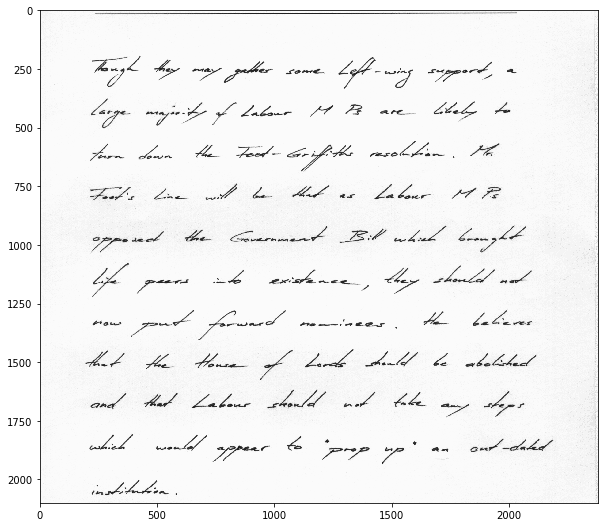

In [47]:


# Load in Grayscale
img = cv2.imread('a01-003.png')
img = img[700:2800, 100:3000]

# The underlying representation is a numpy array!
print(type(img))

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

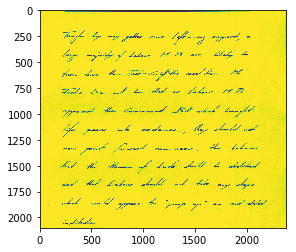

In [48]:
#import image
#image = cv2.imread('a01-000u.png')
#cv2.imshow('orig',image)
#cv2.waitKey(0)

#grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

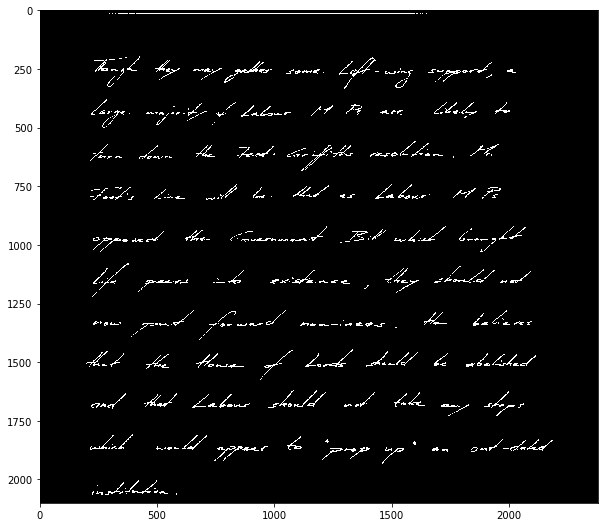

In [49]:
#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap='gray', vmax=1, vmin=0)

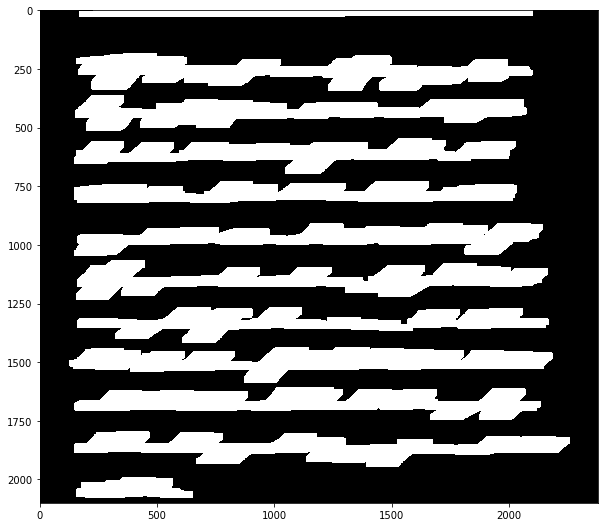

In [50]:
#dilation
kernel = np.ones((25,140), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
plt.figure(figsize=(10,10))
plt.imshow(img_dilation, cmap='gray', vmax=1, vmin=0)

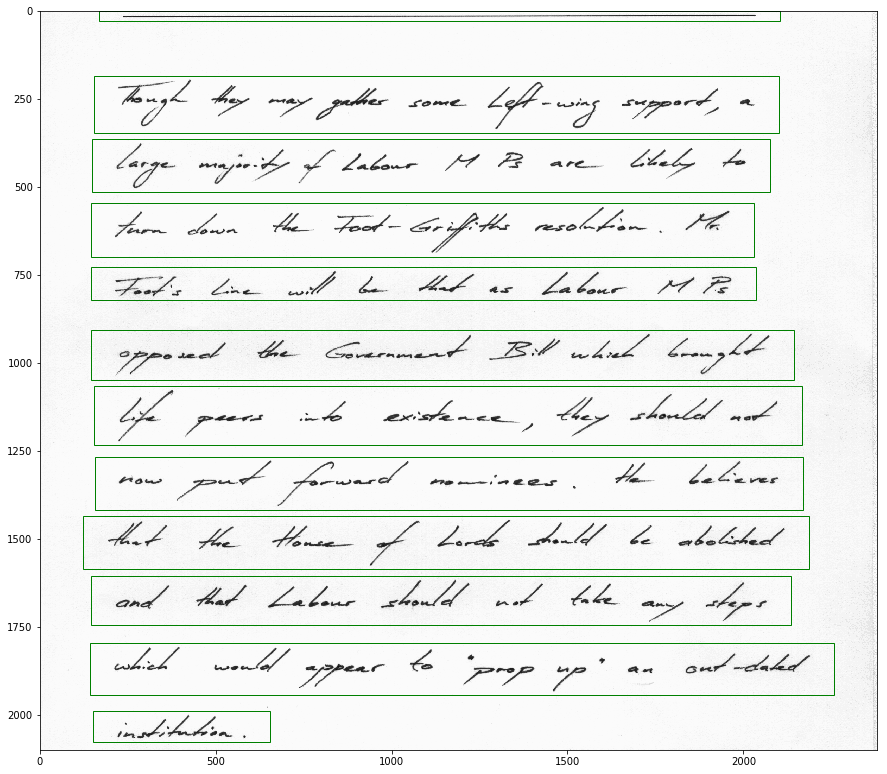

In [51]:
#find contours
im2,ctrs, hier = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

plt.figure(figsize=(15,15))
current_axis = plt.gca()


for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = img[y:y+h, x:x+w]

    # show ROI
    plt.imshow(roi)
    current_axis.add_patch(Rectangle((x, y), w, h, edgecolor = 'g', fill=False, linewidth=1)) 
    #cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
    #cv2.waitKey(0)


plt.imshow(img)
#cv2.waitKey(0)
plt.show()

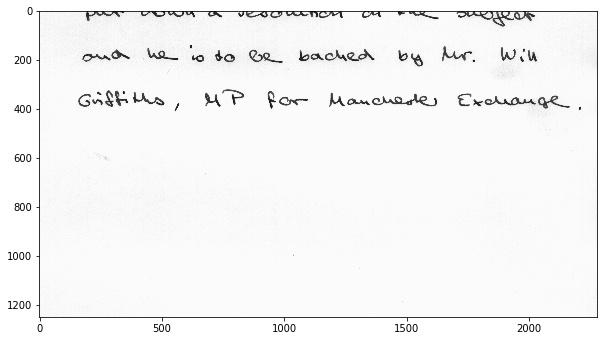

In [30]:
roi = img[750:2750, 100:3000]

# show ROI

plt.figure(figsize=(10,10))
plt.imshow(roi)